 Dataset Selection
Dataset: Social Network Ads
Use: Predict whether a user purchased a product based on their Age and Estimated Salary.

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anchita Lokhande\Downloads\archive (4)\Social_Network_Ads.csv")
print(df.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


2. Load and Inspect Data
Use pandas to load the CSV file.
Check for missing values, data types, and preview the data with .head() and .info().



In [2]:
print(df.describe())
print(df.info())


            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memo

3. Class Distribution



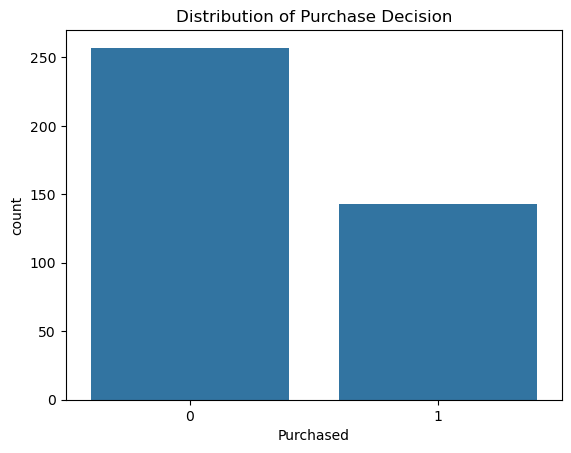

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Purchased', data=df)
plt.title('Distribution of Purchase Decision')
plt.show()


4. Feature Relationships


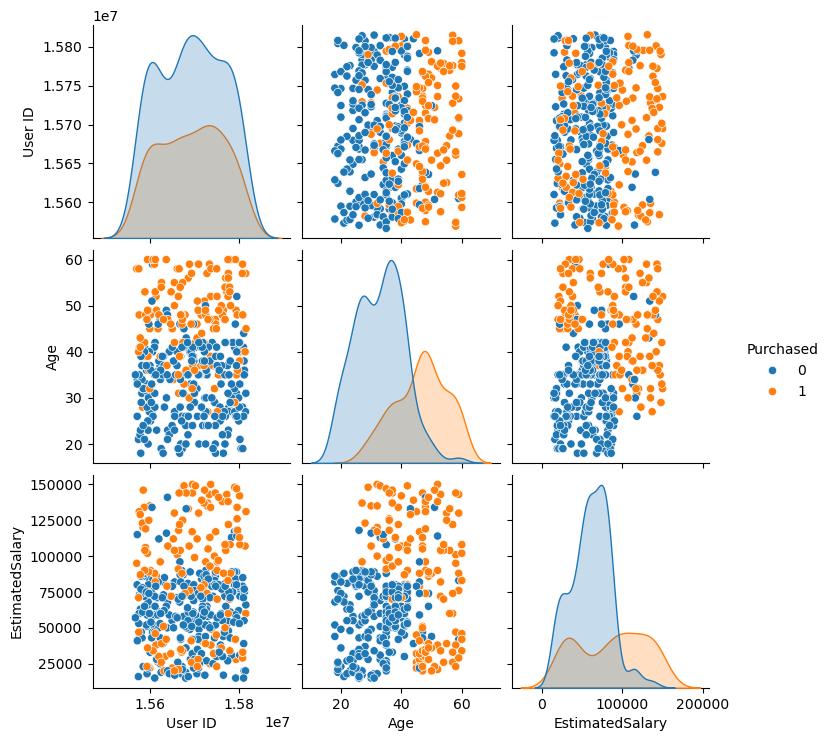

In [5]:
sns.pairplot(df, hue='Purchased')
plt.show()


Data Preprocessing
1. Feature Selection
Exploratory Data Analysis (EDA)
Plot class distribution to see how many users purchased vs. didn’t.
Use pairplots or scatterplots to explore relationships between age, salary, and purchase decision.



In [6]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


2. Train-Test Split
Split the data into training (80%) and test (20%) using train_test_split.



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Feature Scaling
Use StandardScaler to normalize features so KNN can calculate accurate distances.




In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


Model Building with KNN
1. Training the Model
 Model Training (KNN)
Initialize KNN with n_neighbors=5 (you can experiment with other values).
Train using the training data.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

2. Making Predictions
Use the trained model to predict on the test data.

In [10]:
y_pred = knn.predict(X_test)


Model Evaluation
Use:
Accuracy Score for overall performance,
Confusion Matrix for error types,
Classification Report for precision, recall, and F1-score.




In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


[[48  4]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80

Accuracy: 0.9125


Visualization
1. Confusion Matrix Heatmap
Plot:
Confusion Matrix heatmap for clarity,
Decision Boundary to visually understand how KNN classifies different regions of the feature space.



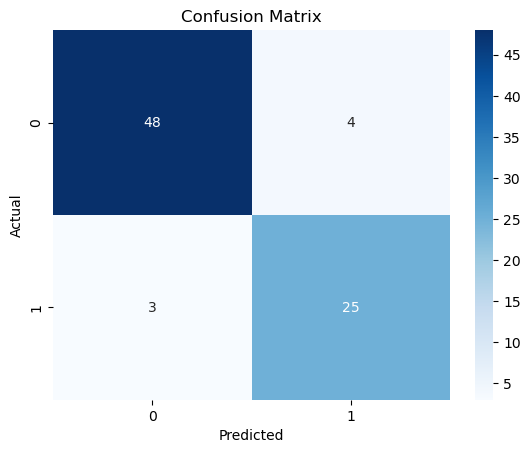

In [13]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


2. Decision Boundary


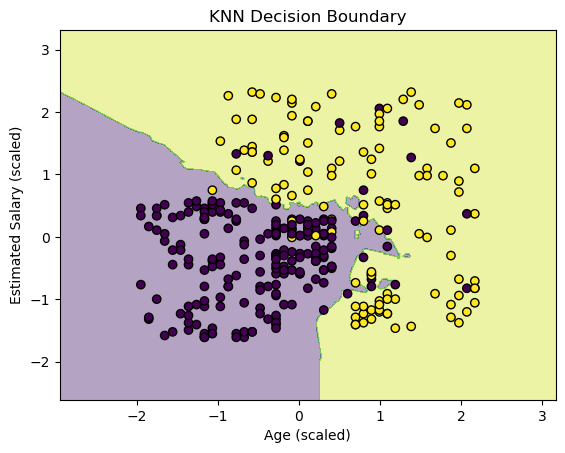

In [14]:
import numpy as np

h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.title('KNN Decision Boundary')
plt.show()


This project demonstrates the application of the 
K-Nearest Neighbors algorithm to predict purchasing behavior based on user demographics.
Through thorough EDA, preprocessing, model training, and evaluation, 
we've built a classifier capable of making informed predictions.